<a href="https://colab.research.google.com/github/finfrierson/data-science-fundamentals/blob/main/Copy_of_Unit3ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 25.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

# Unit 3 Exercises: Delightfully Diverse Distirbutions

Use these exercises as a chance to explore the probability distributions (dists) from the pymc and preliz libraries. [Moments](https://en.wikipedia.org/wiki/Moment_(mathematics)), the main subject of these exercises, are a great way to describe dists, but there's another  way: [maximum entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Other_examples), which  we'll cover in a later unit.

Here's what we'll cover in this Unit's exercises:
- The first four moments: mean, variance, skew, and kurtosis, as well as the support.
- Single variable continuous distributions.
- Single variable discrete distriutions


Why do we need to know this stuff? Two reasons:
- Probability distributions are required to set priors and likelihoods in pymc.
- Randomness and uncertainty are not well defined mathematically, but probability and probability distributions are.

With that in mind, think of these exercises as an oppurtunity to explore the ways we can be uncertain, or the ways things can be random.

## The First Four Moments: Mean, Variance, Skew, and Kurtosis

When we talk about a probablity dist, we often care about at four things:
- The expected value, or where a distribution is centered (mean)
- The amount of variation from that centered value (variation)
- Whether or not our distribution favors, leans towards, or skews towards certain values. (skew)
- How often to expect unusually high or low values. (kurtosis)

In [2]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

### Playing with Beta

**Task1**:

Plot a [preliZ Beta distribution](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.distributions.beta.Beta) with $α=1$ and $β=1$.

<Axes: >

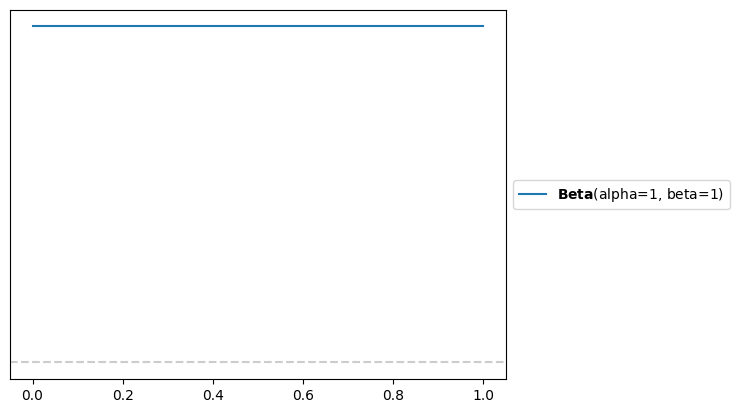

In [3]:
graph = pz.Beta(alpha=1,beta=1)
graph.plot_pdf()


**Task2**:

Find the mean, variance, skew, and kurtosis of a $Beta(1,1)$ distribution. This is the same as asking for the first four moments of a $Beta(1,1)$ distribution.

*Hint*: preliZ has built in function that does this for you.

In [4]:
graph.moments(types='msvk')

[0.5, array(0.), 0.08333333333333333, -1.2]

**Task3**:

Plot the following distributions: $Beta(1,1)$, $Beta(0.9,0.9)$, $Beta(2,1)$, $Beta(1,2)$, $Beta(7,11)$, $Beta(96,42)$, $Beta(5,5)$, $Beta(500,500)$, $Beta(0.8,0.9)$.

Then, determine which of those distribtuions has:
- the largest/smallest mean
- the largest/smallest variance
- the largest/smallest skew
- the largest/smallest kurtosis

In [5]:
a=pz.Beta(alpha=1,beta=1).moments(types='msvk') #1
b=pz.Beta(alpha=.9,beta=.9).moments(types='msvk') #2
c=pz.Beta(alpha=2,beta=1).moments(types='msvk') #3
d=pz.Beta(alpha=1,beta=2).moments(types='msvk') #4
e=pz.Beta(alpha=7,beta=11).moments(types='msvk') #5
f=pz.Beta(alpha=96,beta=42).moments(types='msvk') #6
g=pz.Beta(alpha=5,beta=5).moments(types='msvk') #7
h=pz.Beta(alpha=500,beta=500).moments(types='msvk') #8
i=pz.Beta(alpha=.8,beta=.9).moments(types='msvk') #9
lisssst = [a, b, c, d, e, f, g, h, i]
maximum_value = 0
count = 0
graph = ""
#I ran through this multiple times and changed it up to find each value.
for item in lisssst:
  global maximum_value
  global count
  count+=1
  if item[0] > maximum_value:
    maximum_value = item[0]
    graph = count

maximum_value, graph


(0.6956521739130435, 6)

mean least: 0.3333333333333333, graph 4
mean greatest: 0.6956521739130435, graph 6
skew least:-0.565685424949238, graph 3
skew greatest: 0.565685424949238, graph 4
variance least: 0.00024975024975024975, graph 8
variance greatest: 0.09227220299884659, graph 9
kurtosis least: 0.005982053838484547, graph 8
kurtosis greatest: 1.263657274295572, graph 9

###Playing with other Continuous Distributions

For the remaining tasks, make sure to continue to use the [preliZ documentation](https://preliz.readthedocs.io/en/latest/api_reference.html).

The [wikipedia pages for each of the probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions) are also great resources.

[Wolfram Alpha](https://www.wolframalpha.com/examples/mathematics/probability/probability-distributions) is another great resource as well.

**Task4**:

Plot the pdfs of each of the following distrib utions: $Normal(μ=0,σ=1)$, $StudentT(ν=1,μ=0,σ=1)$, $Exponential(λ=1/2)$, $Gamma(α=2,β=1)$, $HalfStudentT(ν=1,σ1)$

For the T distribution, use

```
support=(-4,4)
```
inside the plot_pdf function.


<Axes: >

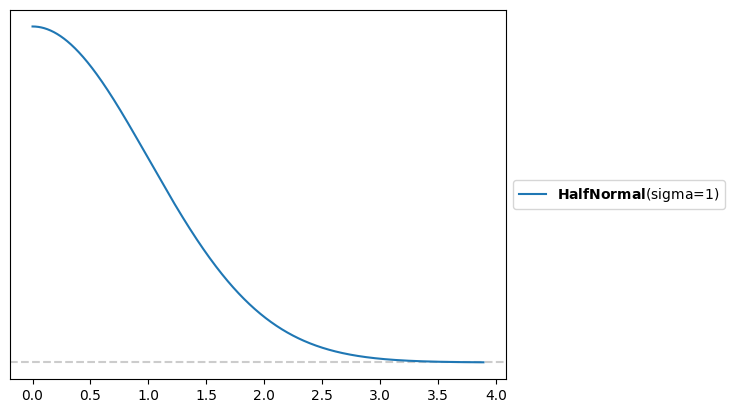

In [6]:
pz.HalfNormal(sigma=1).plot_pdf()

<Axes: >

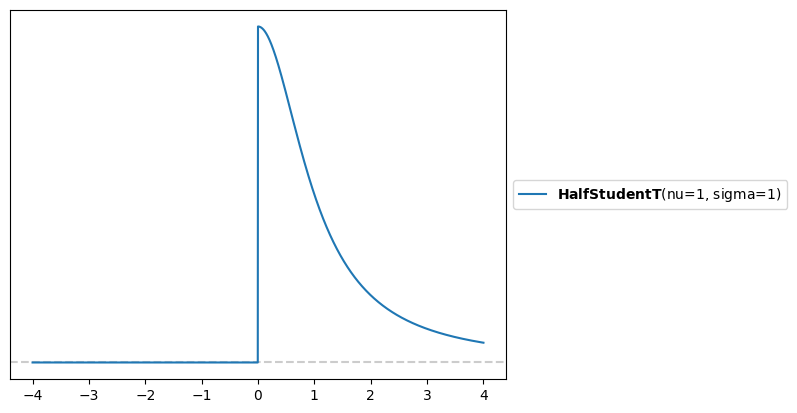

In [7]:
pz.HalfStudentT(nu=1, sigma=1).plot_pdf(support=(-4,4))

<Axes: >

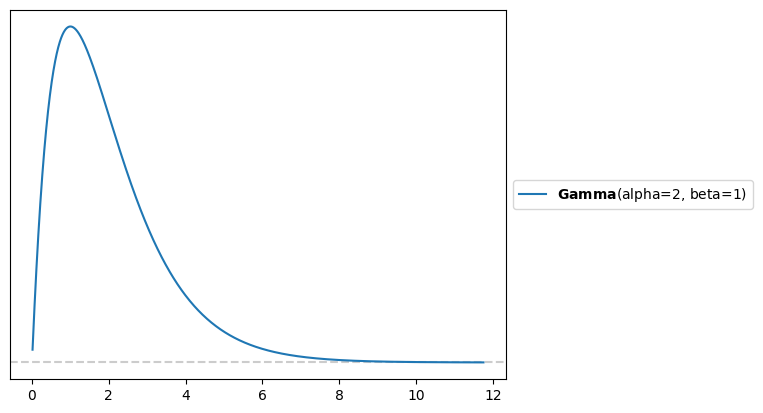

In [8]:
pz.Gamma(alpha=2,beta=1).plot_pdf()

<Axes: >

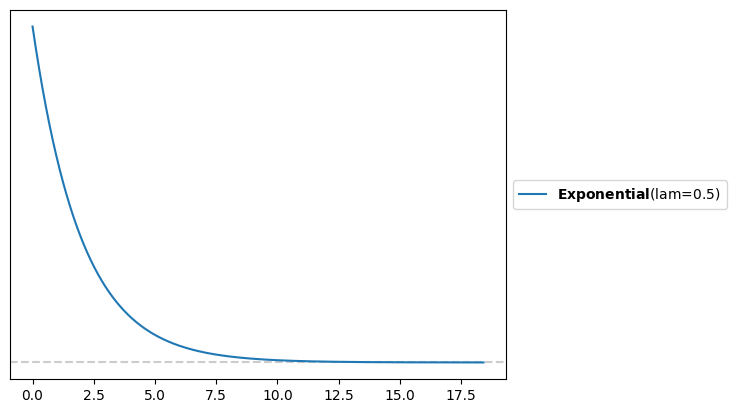

In [9]:
pz.Exponential(lam=1/2).plot_pdf()

<Axes: >

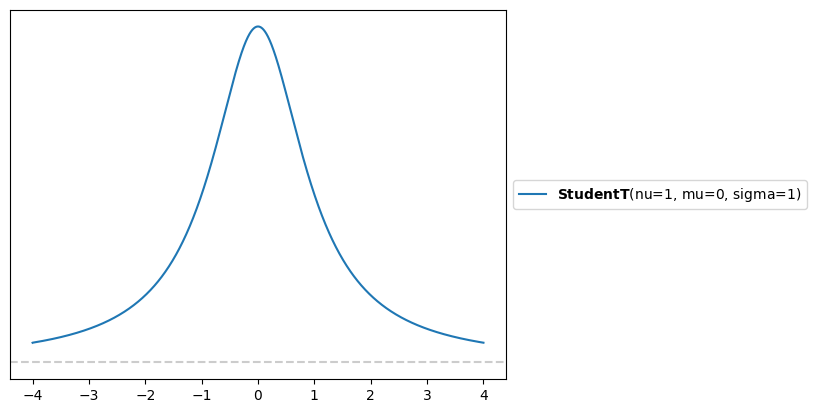

In [10]:
pz.StudentT(nu=1,mu=0,sigma=1).plot_pdf(support=(-4,4))

<Axes: >

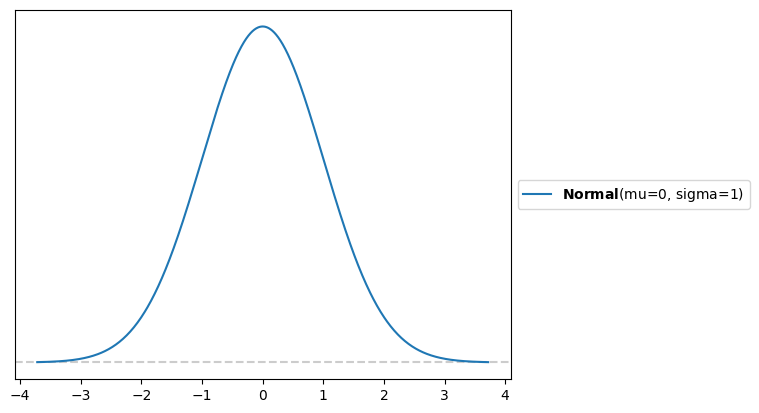

In [11]:
pz.Normal(mu=0,sigma=1).plot_pdf()

**Task5**:

What x values do the Exponenital, Gamma, HalfSutdentT, and HalfNormal functions support? What x values do the Normal and T distribution support? What x values does the Beta distribution support?

**Task6**:

Can a distribution with support $[0,∞]$ have zero skew? If so, plot that specific distribution.
Yup!

<Axes: >

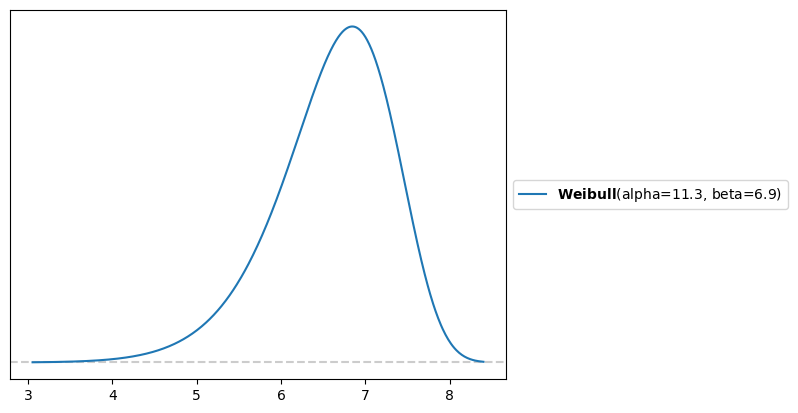

In [12]:
pz.Weibull(alpha=11.3, beta=6.9).moments(types = "vsk")
pz.Weibull(alpha=11.3, beta=6.9).plot_pdf()

**Task7**:

Name a distribution that supports the real numbers with variance equal to 1, 0 skew, and 0 kurtosis.

In [13]:
pz.Normal(mu=1, sigma=1).moments(types="svk")

[0, 1.0, 0]

**Task8**:

Name a distribution with support $(-∞,∞)$ and that has negative skew.

In [14]:
pz.AsymmetricLaplace(kappa=1.0000000000000001111111,mu=1,b=1).moments(types="s")

[-9.420554752102644e-16]

###Playing with Discrete Distributions

**Task9**:

Plot the pdfs (techincally the pmfs) of the following distributions: $Bernoulli(p=0.7)$, $Binomial(n=10,p=0.7)$, $Poisson(λ=7)$, $Geometric(p=0.7)$, $HyperGeometric(N=50,k=35,n=15)$, $Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4])$

Additionally, compute the first four moments for all those distributions--except the Categorical distribution.

<Axes: >

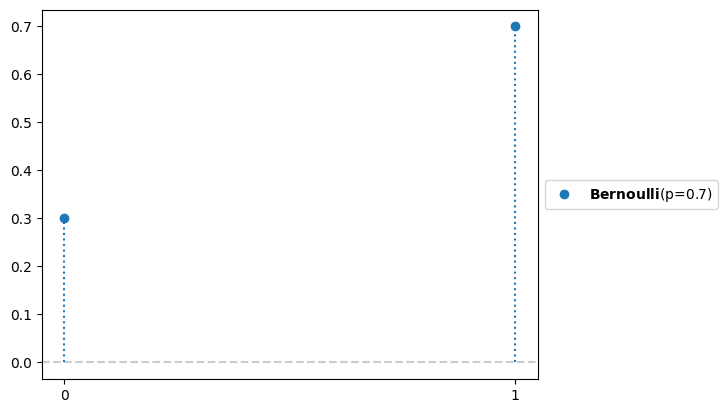

In [19]:
pz.Bernoulli(p=.7).plot_pdf()

<Axes: >

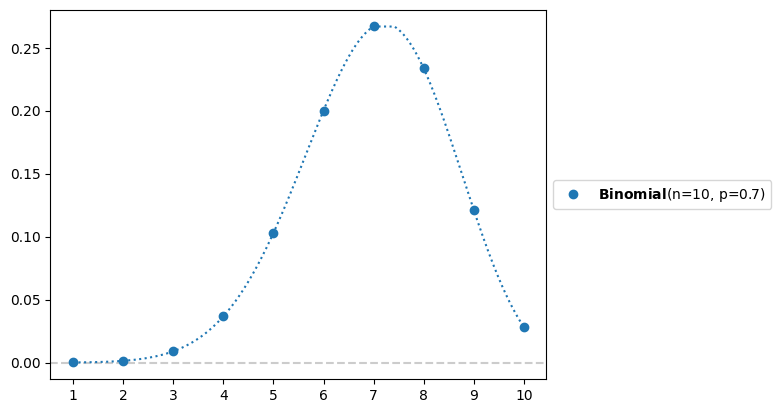

In [20]:
pz.Binomial(n=10,p=.7).plot_pdf()

<Axes: >

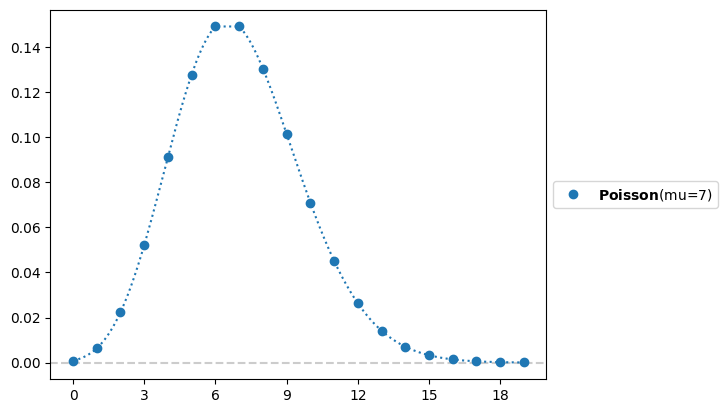

In [21]:
pz.Poisson(mu=7).plot_pdf()

<Axes: >

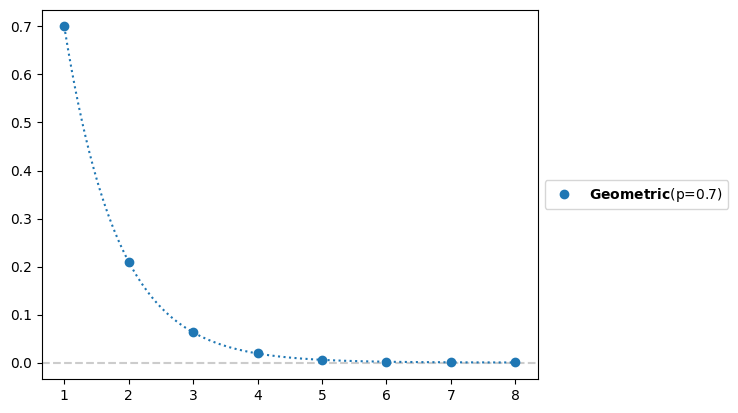

In [22]:
pz.Geometric(p=.7).plot_pdf()

<Axes: >

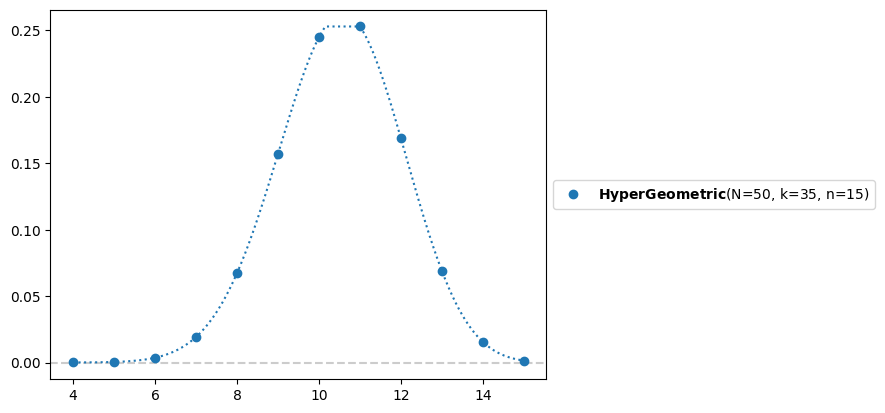

In [23]:
pz.HyperGeometric(N=50, k=35, n=15).plot_pdf()

<Axes: >

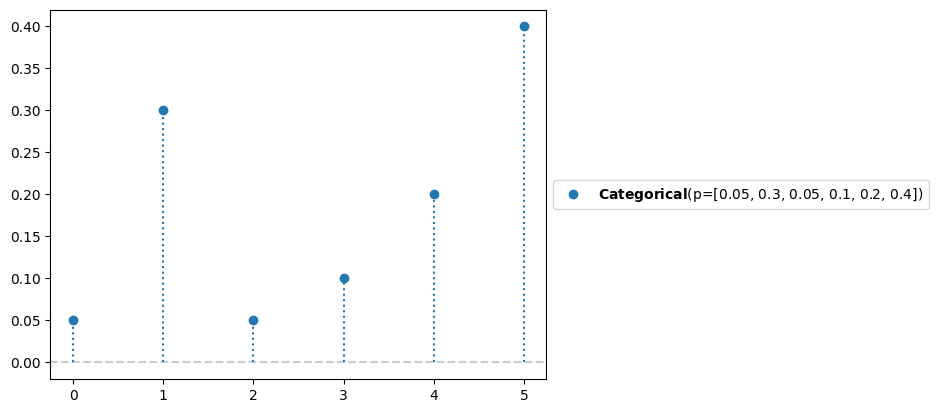

In [24]:
pz.Categorical(p=[0.05,0.3,0.05,0.1,0.2,0.4]).plot_pdf()

In [27]:
pz.Bernoulli(p=.7).moments(types="msvk"), pz.Binomial(n=10,p=.7).moments(types="msvk"), pz.Poisson(mu=7).moments(types="msvk"), pz.Geometric(p=.7).moments(types="msvk"), pz.HyperGeometric(N=50, k=35, n=15).moments(types="msvk")

([0.7, -0.8728715609439692, 0.21000000000000002, -1.238095238095238],
 [7.0, -0.27602622373694163, 2.1000000000000005, -0.12380952380952379],
 [7.0, 0.3779644730092272, 7.0, 0.14285714285714285],
 [1.4285714285714286,
  2.3734644158557194,
  0.6122448979591838,
  7.633333333333333],
 [10.5, -0.1111111111111111, 2.25, -0.08983451536643026])

**Task10**:

Describe what process each of the previous discrete distributions models, and their support.

Hint: Make sure to read any of the preliZ documentation, the wikipedia articles, or wolfram alpha.


The bernoulli models the chances of success and failure using the support of 0 and 1. If the value is 0, it is a fail, If the value is a 1, it is a success. This means that that in a bernoulli model, the graph should always be at x=0 and x=1 with the value at x=0 and x=1 adding to 1.

The Binomial model finds the probability distribution from the number of successes in a sequence of n independant yes/no probabilities. Its support is from 0 to n, with only integers

The Poisson distribution models the number of events occuring in a specific time frame when time of events occuring is independent. It's support is $x \in \mathbb{N}_0$

The Geometric distibution is the chance that a success occurs for the first time at different x intervals. Its support is $x \in \mathbb{N}_{>0}$

The HyperGeometric distribution is the chance that a certain number of successes happen in a sequence of bernoulli trials without replacing items. Its support is $x \in \left[\max(0, n - N + k), \min(k, n)\right]$

The Categorical model plots each data point given, its a relatively straight forwards model. The support is the number of values you give it.